#**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()  # Set the default parameters

#**Mounting the Drive**
**To read the file (Dataset)**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/Datasets/breast-cancer.csv' #dataset file path

#**Data Collection**

In [5]:
df = pd.read_csv(path)

In [6]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#**Data Preprocessing & EDA**

In [7]:
#The Id column is not serving any useful purpose; let's drop it.
df.drop('id', axis=1, inplace=True)

**Duplicate Record**

In [8]:
print(f'The Number of Duplicate Records Are: {df.duplicated().sum()}')

The Number of Duplicate Records Are: 0


**Total Instances:** 569 <br>
**with zero duplicate record.**<br>
**30 Features + Target Variable: "diagnosis"**

In [9]:
df.shape

(569, 31)

**Features Overview**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**All of the features are numerical, except the target variable**

In [11]:
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

**DataFrame Columns**

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Column Categorization Observation**

In the DataFrame's column list, it is evident that there are three distinct categories for each feature, such as `radius_mean`, `radius_se`, and `radius_worst`. This pattern is repeated for all other features in the dataset.

To facilitate a more focused and structured analysis, we can organize these columns into separate lists based on their categories. This division will allow us to study and analyze each category independently, gaining deeper insights into the data.

In [13]:
df_mean = df.filter(like='_mean', axis=1).columns
df_se = df.filter(like='_se', axis=1).columns
df_worst = df.filter(like='_worst', axis=1).columns

In [14]:
df_mean.shape, df_worst.shape, df_se.shape

((10,), (10,), (10,))

This categorization will allow us to focus on specific aspects of the data, potentially revealing valuable insights for our analysis.

**Basic Statistics**

In [15]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##**Features Skewness**

The skewness of a dataset is often used to understand the shape of the data distribution. Here's what the different values of skewness indicate:

1. **Positive Skew (right-skewed)**: If the skewness is greater than 0, it means the data is stretched out to the right. In a right-skewed distribution, the tail on the right side is longer or fatter than the left side. This typically indicates that the data has a concentration of smaller values and a few larger values.

2. **Negative Skew (left-skewed)**: If the skewness is less than 0, it means the data is stretched out to the left. In a left-skewed distribution, the tail on the left side is longer or fatter than the right side. This suggests that the data has a concentration of larger values and a few smaller values.

3. **Zero Skew (symmetric)**: If the skewness is close to 0, it indicates that the data is approximately symmetrically distributed, meaning that the left and right sides of the distribution are roughly balanced.

In [16]:
df.skew(numeric_only=1)

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

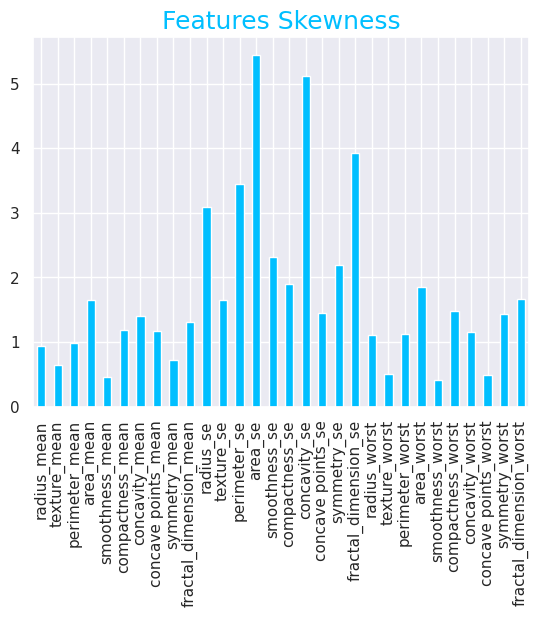

In [17]:
df.skew(numeric_only=True).plot(kind='bar', color='deepskyblue')
plt.title('Features Skewness', fontsize=18, color='deepskyblue')
plt.xticks(rotation=90)
plt.show()

The graph indicates that the skewness of all the features tends to be right-skewed, with some showing a particularly strong right-skew. This skewness is evident from the positive values on the plot.

**Let's proceed with further visualizations and analysis to gain more insights into the data.**

###**Features Group-A (_mean Features)**

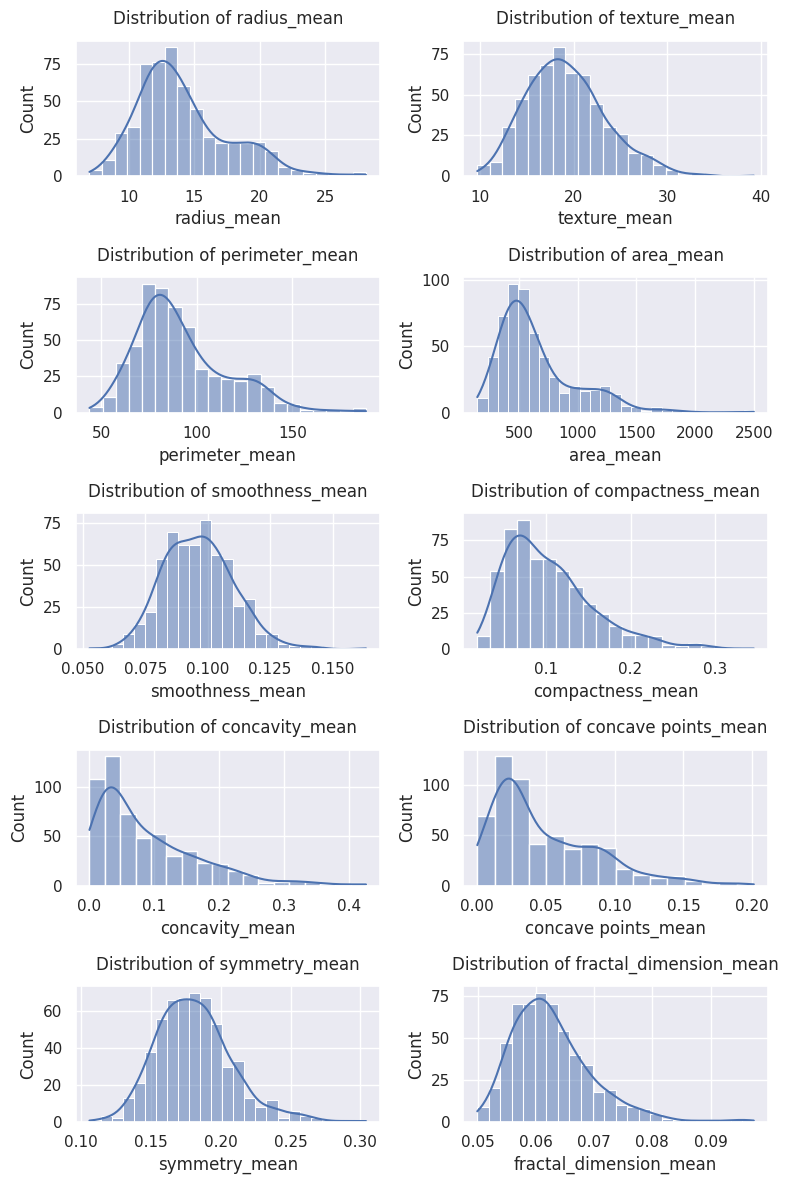

In [18]:
rows = 5
col = 2

fig, ax = plt.subplots(nrows=rows, ncols=col, figsize=(8,12))

for i in range(rows):
  for j in range(col):
    sns.histplot(x=df_mean[i*col+j], data=df, kde=True, ax=ax[i,j])
    ax[i,j].set_title(f'Distribution of {df_mean[i*col+j]}', fontsize=12, pad=12)
plt.tight_layout()
plt.show()

###**Features Group-B (_se Features)**

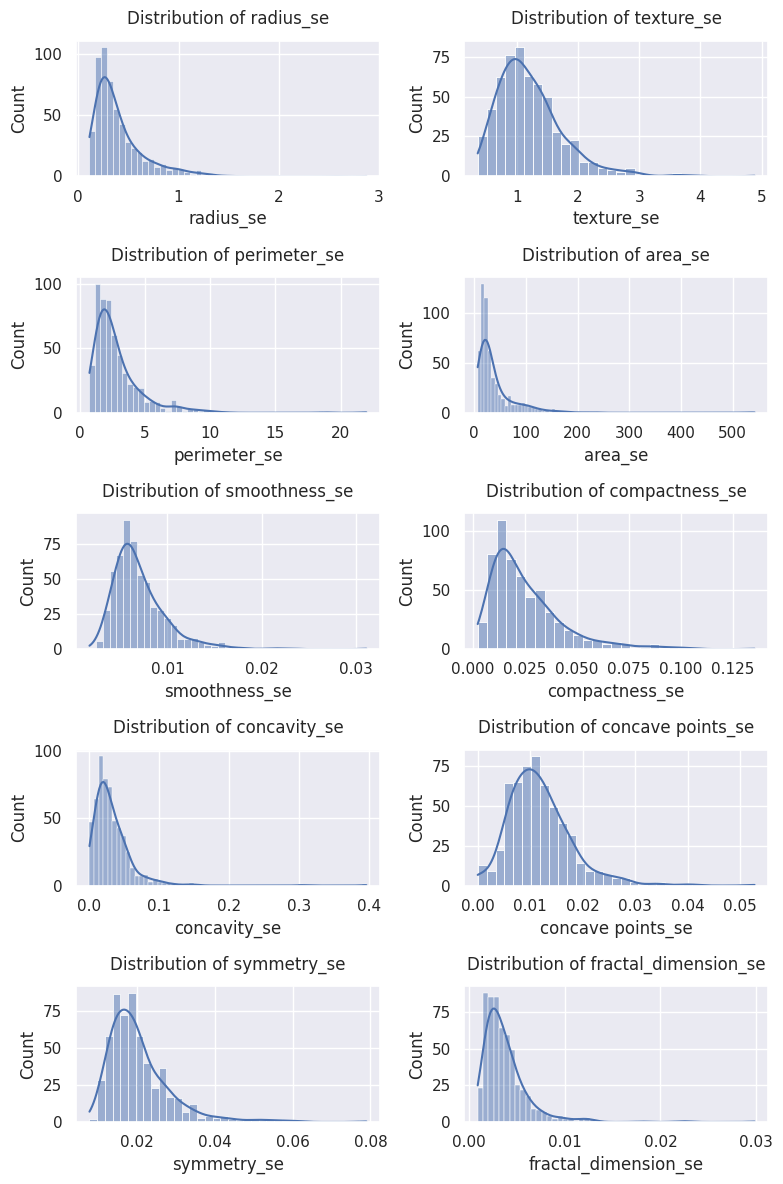

In [19]:
rows = 5
col = 2

fig, ax = plt.subplots(nrows=rows, ncols=col, figsize=(8,12))

for i in range(rows):
  for j in range(col):
    sns.histplot(x=df_se[i*col+j], data=df, kde=True, ax=ax[i,j])
    ax[i,j].set_title(f'Distribution of {df_se[i*col+j]}', fontsize=12, pad=12)
plt.tight_layout()
plt.show()

###**Features Group-C (_worst Features)**

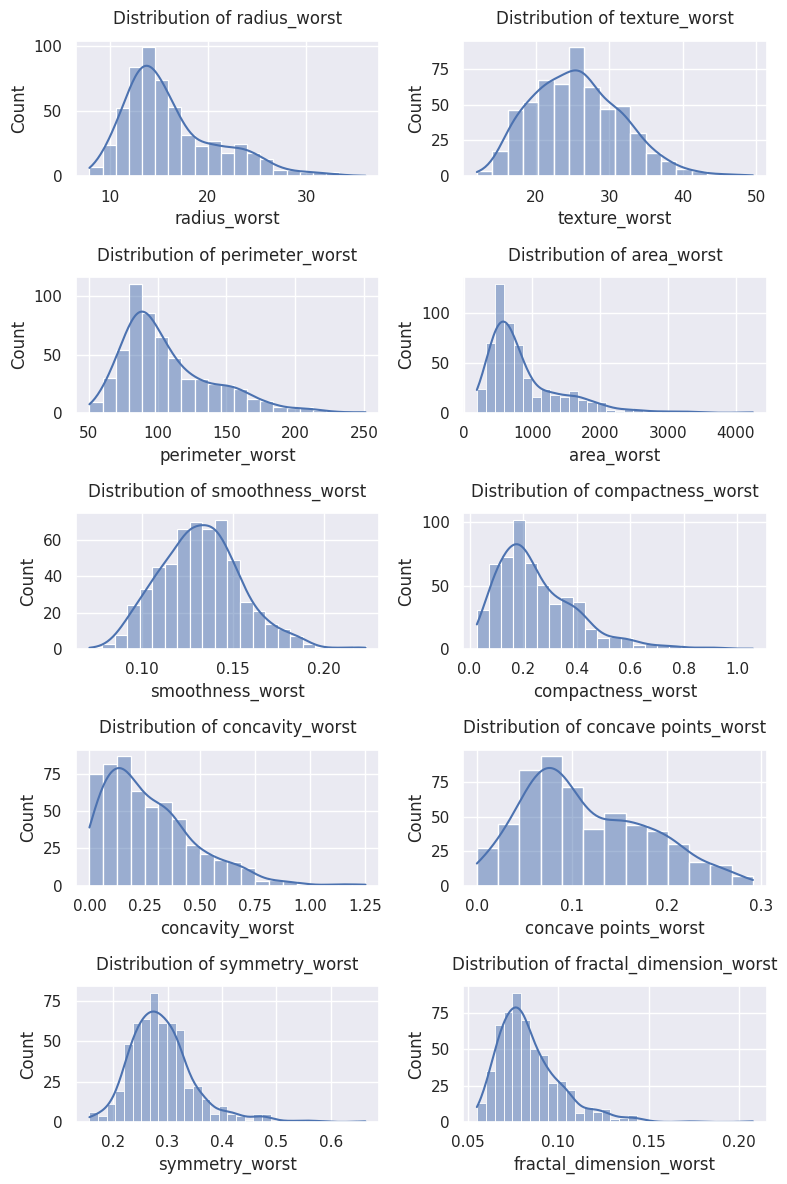

In [20]:
rows = 5
col = 2

fig, ax = plt.subplots(nrows=rows, ncols=col, figsize=(8,12))

for i in range(rows):
  for j in range(col):
    sns.histplot(x=df_worst[i*col+j], data=df, kde=True, ax=ax[i,j])
    ax[i,j].set_title(f'Distribution of {df_worst[i*col+j]}', fontsize=12, pad=12)
plt.tight_layout()
plt.show()

##**Target Counts**

In [21]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

* M = Malignant (Cancerous) - Present
* B = Benign (Not Cancerous) -Absent

In [22]:
total = df.shape[0]
target_count = df['diagnosis'].value_counts()

print(f'Percentage of Cancerous Target (M- Malignant): {(target_count.get("M")/total)*100: .2f}-%')
print(f'Percentage of Not-Cancerous Target (B-Benign): {(target_count.get("B")/total)*100: .2f}-%')

Percentage of Cancerous Target (M- Malignant):  37.26-%
Percentage of Not-Cancerous Target (B-Benign):  62.74-%


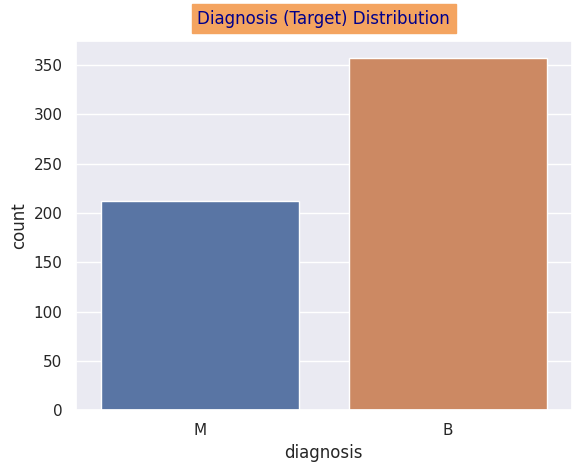

In [23]:
sns.countplot(x='diagnosis', data=df)
plt.title(f'Diagnosis (Target) Distribution',  color='darkblue',
                        backgroundcolor='sandybrown', pad=12)
plt.show()

* M = Malignant (Cancerous) - Present
* B = Benign (Not Cancerous) -Absent

##**Target Variable Encoding**

In [24]:
df['target']  = df['diagnosis'].map({'M':1, 'B':0})
df.drop('diagnosis', axis=1, inplace=True) #drop the old target column

##**Correlation**

##**Features Group-A (_mean Features)**

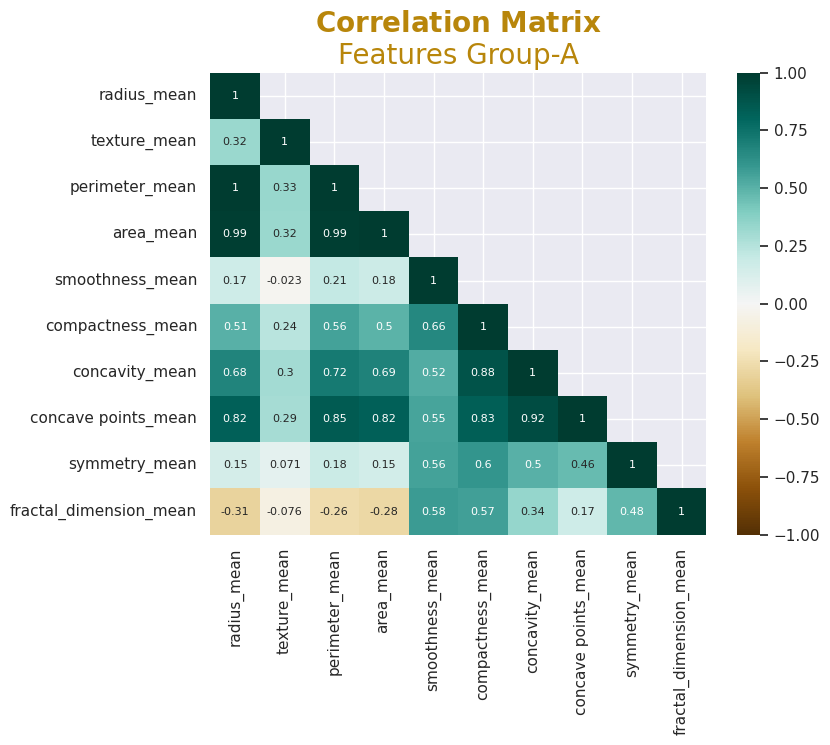

In [25]:
corr=df[df_mean].corr()

plt.figure(figsize=(8,6))
mask = ~np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 8}, cmap='BrBG', vmin=-1, vmax=1)

title = r'$\bf{Correlation\ Matrix}$' + '\nFeatures Group-A'

plt.title(title, loc='center', fontsize=20, color='darkgoldenrod')
plt.show()


**Please note that features with strong negative correlations are just as important as those with positive correlations. Our primary interest lies in the correlation of the target variable. Let's take a look at the absolute values of the correlation graph for the target variable.**

##**Features Group-B (_se Features)**

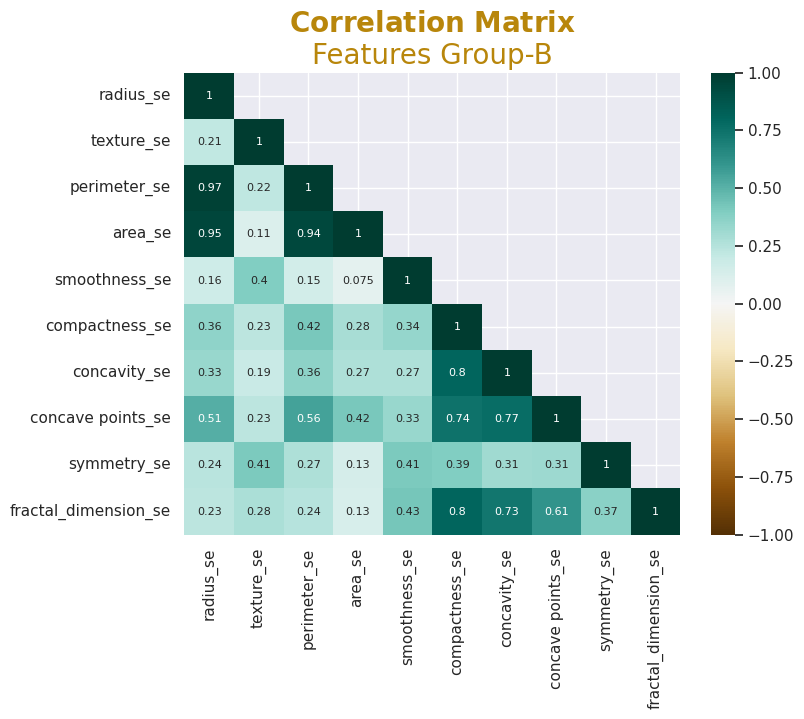

In [26]:
corr=df[df_se].corr()

plt.figure(figsize=(8,6))
mask = ~np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 8}, cmap='BrBG', vmin=-1, vmax=1)

title = r'$\bf{Correlation\ Matrix}$' + '\nFeatures Group-B'

plt.title(title, loc='center', fontsize=20, color='darkgoldenrod')
plt.show()


##**Features Group-C (_worst Features)**

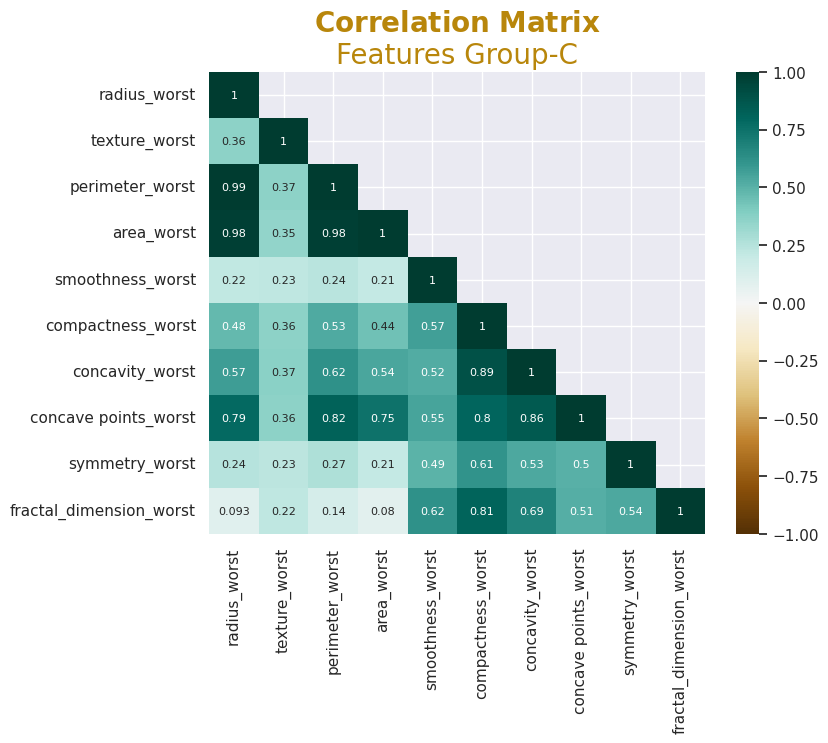

In [27]:
corr=df[df_worst].corr()

plt.figure(figsize=(8,6))
mask = ~np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 8}, cmap='BrBG', vmin=-1, vmax=1)

title = r'$\bf{Correlation\ Matrix}$' + '\nFeatures Group-C'

plt.title(title, loc='center', fontsize=20, color='darkgoldenrod')
plt.show()


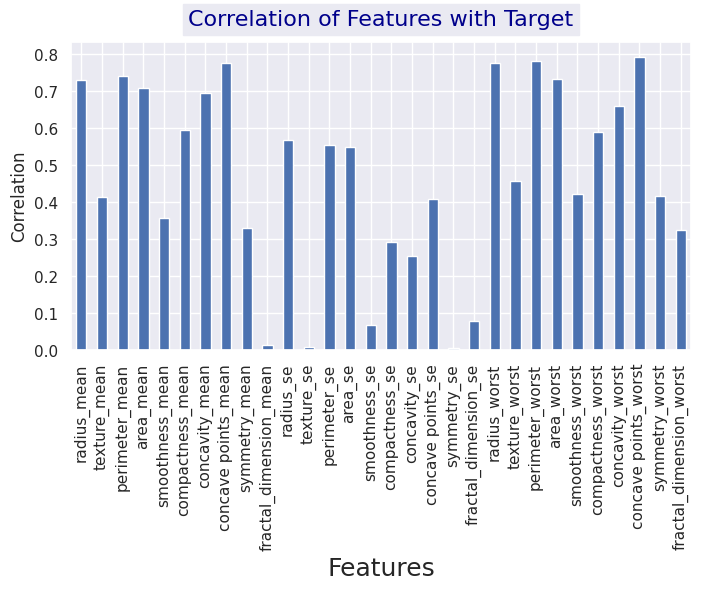

In [28]:
corr_target = df.corr()['target'].abs()  #Absolute value correlation of all features with the target variable

# Create a bar plot
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
corr_target.drop('target').plot(kind='bar')
plt.title('Correlation of Features with Target', fontsize=16,
          backgroundcolor= '#EAEAF2', color='darkblue', pad=12)
plt.ylabel('Correlation', fontsize=12)
plt.xlabel('Features', fontsize=18)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()


##**Data Splitting**

In [29]:
from sklearn.model_selection import train_test_split as tts

In [30]:
X=df.drop('target',axis=1)
y=df['target']

X_train, X_test,y_train,y_test=tts(X,y,test_size=0.2, shuffle=True, stratify=y, random_state=32)

##**Data Scaling**

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
Scaler = StandardScaler()
Scaler.fit(X_train)
Xtrain_std = Scaler.transform(X_train)
Xtest_std = Scaler.transform(X_test)

y_train = y_train.values
y_test = y_test.values

# **Models Training and Best Feature Extraction**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(Xtrain_std, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_


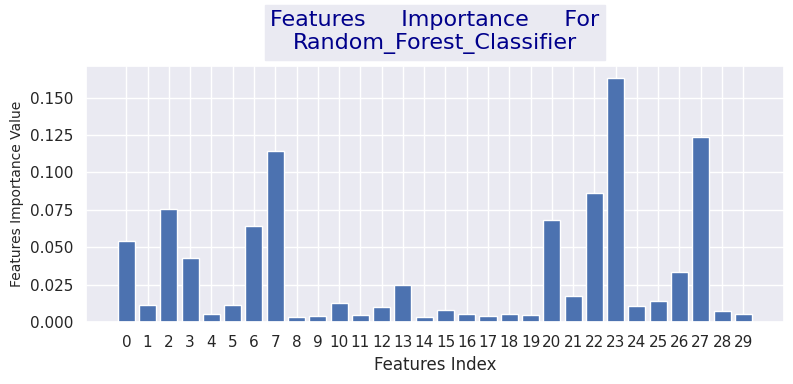

In [35]:
plt.figure(figsize=(8,4))
plt.bar(range(30), feature_importances) #feature indices vs feat importance
plt.xticks(range(30))
plt.title('Features     Importance     For\nRandom_Forest_Classifier', fontsize=16,
          backgroundcolor= '#EAEAF2', color='darkblue', pad=12)
plt.xlabel('Features Index', fontsize=12)
plt.ylabel('Features Importance Value', fontsize=10)
plt.tight_layout()
plt.show()

**Score on training over the all features**

In [36]:
y_pred=rf_classifier.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=rf_classifier.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    100.00
Test Accuracy    :    97.37

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

CONFUSION MATRIX: 

[[71  1]
 [ 2 40]]


**Now let select the most important features and retrain the model using this reduced set of features**

In [37]:
k=10 #Assume the desired number of features
sorted_indices = np.argsort(feature_importances)[::-1]
desired_feat_index = sorted_indices[:k]
print(f'Features at the following indices are the top {k} most important \
features for \nRandom_Forest_Classifier are:\n{desired_feat_index}')

Features at the following indices are the top 10 most important features for 
Random_Forest_Classifier are:
[23 27  7 22  2 20  6  0  3 26]


**Let find this k by experiment**

In [38]:
Ks = np.arange(1,30,dtype='int')
Accuracy_List = []
for k in Ks:
    desired_feat_index = sorted_indices[:k] #Get the top k-features indices
    X_train_new = Xtrain_std[:,desired_feat_index] #Slice the top k-features
    X_test_new = Xtest_std[:,desired_feat_index]

    rf_classifier.fit(X_train_new, y_train) #Model Training

    y_pred=rf_classifier.predict(X_test_new) #Model Prediction

    train_acc = accuracy_score(y_true=y_train, y_pred=rf_classifier.predict(X_train_new))*100
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

    acc = [k, round(train_acc,2), round(test_acc,2)]
    Accuracy_List.append(acc)

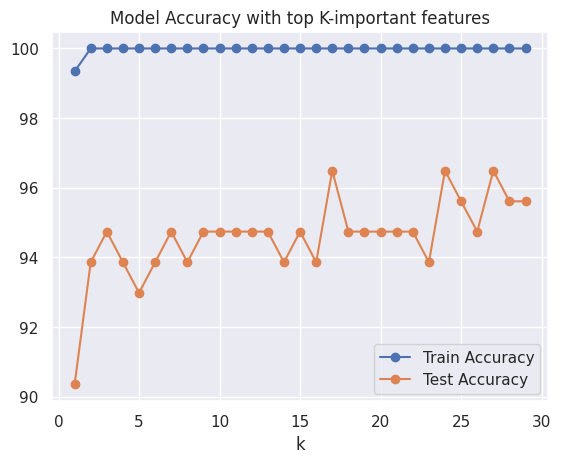

In [39]:
#Lets analyze the best K
K_df = pd.DataFrame(Accuracy_List, columns= ["k", "Train Accuracy", "Test Accuracy"])

K_df.plot(kind='line',marker='o',x='k')
plt.title('Model Accuracy with top K-important features')
plt.grid('on')
plt.show()

**it suggest the `k=17` would be the best.**

In [40]:
k=17

**Retraining Models for Minimal Feature Set (`K` Best Features)**

In [41]:
desired_feat_index = sorted_indices[:k] #Get the top k-features indices
X_train_new = Xtrain_std[:,desired_feat_index] #Slice the top k-features
X_test_new = Xtest_std[:,desired_feat_index]

rf_classifier.fit(X_train_new, y_train) #Model Training

y_pred=rf_classifier.predict(X_test_new) #Model Prediction

train_acc = accuracy_score(y_true=y_train, y_pred=rf_classifier.predict(X_train_new))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    100.00
Test Accuracy    :    96.49

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

CONFUSION MATRIX: 

[[71  1]
 [ 3 39]]


**Achive the almost same accuracy over the reduced dataset**

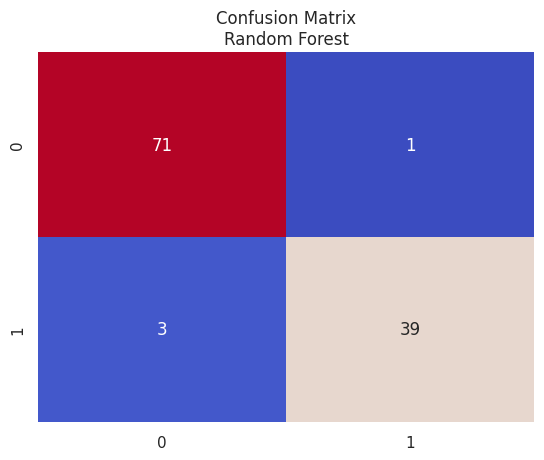

In [42]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0, cmap='coolwarm')
plt.title('Confusion Matrix\nRandom Forest')
plt.show()

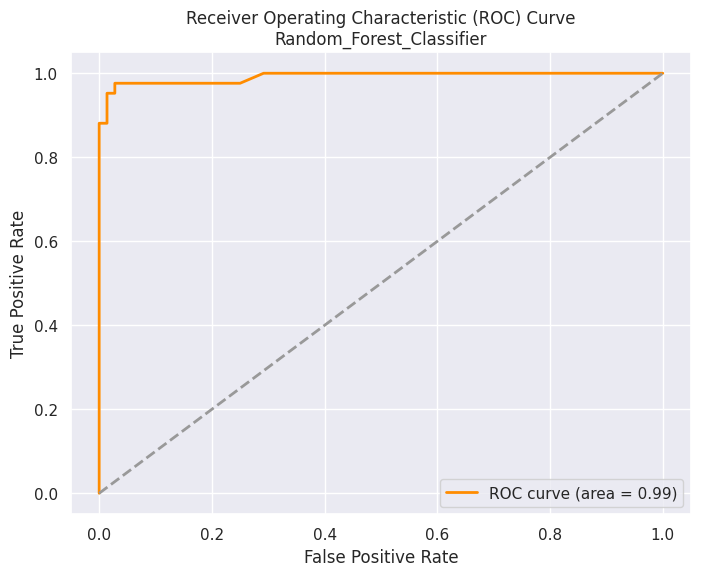

In [43]:
predicted_probabilities = rf_classifier.predict_proba(X_test_new)
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nRandom_Forest_Classifier')
plt.legend(loc='lower right')
plt.show()

##**Support Vector Classification**

In [44]:
from sklearn.svm import SVC

In [45]:
svc=SVC(C=1.0, kernel='rbf', random_state=42, probability=True)
svc.fit(Xtrain_std,y_train)
y_pred=svc.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=svc.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    98.68
Test Accuracy    :    99.12

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

CONFUSION MATRIX: 

[[72  0]
 [ 1 41]]


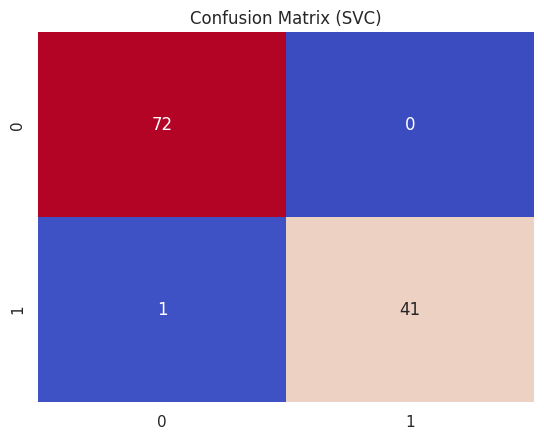

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0, cmap='coolwarm')
plt.title('Confusion Matrix (SVC)')
plt.show()

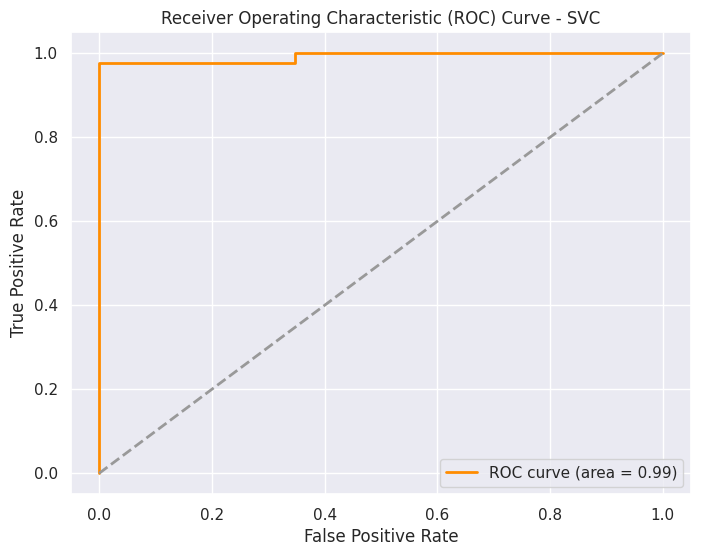

In [47]:
predicted_probabilities = svc.predict_proba(Xtest_std)
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVC')
plt.legend(loc='lower right')
plt.show()